In [1]:
# Importing data anlaysis and visualizations libraries..
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Read dataset and get overall info..
cars = pd.read_csv('cars.csv')
print(cars.info())
cars.head(40)
cars.columns = cars.columns.str.strip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
mpg             261 non-null float64
 cylinders      261 non-null int64
 cubicinches    261 non-null object
 hp             261 non-null int64
 weightlbs      261 non-null object
 time-to-60     261 non-null int64
 year           261 non-null int64
 brand          261 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB
None


In [3]:
cars.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [4]:
# Grabbing Dataframe with all columns except the target(i.e. brand column)
# Alternate way:
# df = cars.iloc[:,:-1].values
df = cars.drop('brand',axis=1)
#df = pd.DataFrame(df,columns=['mpg' , 'cylinders', 'cubicinches', 'hp' ,'weightlbs', 'time-to-60', 'year'])
#df.info()
# Replace Nan/null values with 0 or either with mean of its column...
df['weightlbs']=df.weightlbs.apply(lambda x: x.replace(' ','0'))
df['cubicinches'] = df.cubicinches.apply(lambda x: x.replace(' ','0'))
df = df.convert_objects(convert_numeric=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
mpg            261 non-null float64
cylinders      261 non-null int64
cubicinches    261 non-null int64
hp             261 non-null int64
weightlbs      261 non-null int64
time-to-60     261 non-null int64
year           261 non-null int64
dtypes: float64(1), int64(6)
memory usage: 14.4 KB


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # Remove the CWD from sys.path while we load stuff.


In [5]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Inertia value')

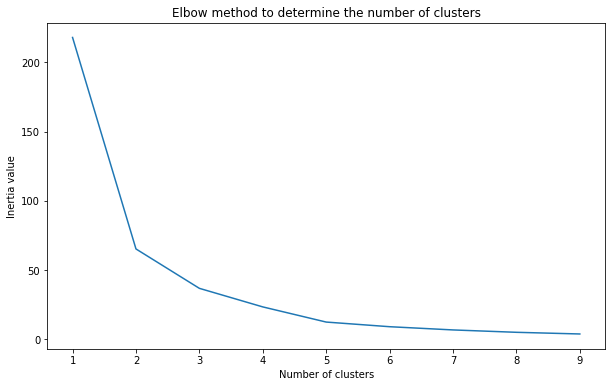

In [6]:
# Using elbow method to determine the 
inertia=[]
clusters = range(1,10)
for i in clusters:
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=9, random_state=101)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
#print(inertia)
X = np.array(inertia)/pow(10,6)
#print(X)
# Plotting a graphfor getting the elbow point....
plt.figure(figsize=(10,6))
plt.plot(clusters,X)
plt.title('Elbow method to determine the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia value')

In [7]:
# Since, kmeans is unsupervised learning, we aren't provided with target values
# But luckily our dataset contains target values so lets check how good our model is...
kmeans = KMeans(n_clusters=3)
pred = kmeans.fit_predict(df)
print(pred)

[1 2 0 1 2 1 1 1 0 2 2 2 1 1 2 1 2 0 2 2 2 0 0 1 2 2 2 1 1 2 2 0 0 2 2 0 2
 0 1 0 1 1 1 0 0 0 1 2 2 0 1 0 1 2 1 1 0 2 2 1 0 2 0 2 1 0 2 2 2 1 0 0 2 0
 2 0 0 0 2 2 1 1 0 0 2 2 0 0 2 0 2 2 1 0 2 1 1 0 1 1 1 1 2 2 2 0 2 2 0 0 2
 0 1 2 2 1 0 0 2 1 2 2 1 0 2 0 1 2 0 2 2 0 1 1 1 1 2 0 0 0 0 2 0 2 1 0 0 0
 1 0 0 0 1 0 2 0 2 2 0 0 0 1 0 0 2 0 0 0 0 2 2 0 2 0 2 2 1 1 1 2 0 2 1 0 2
 0 0 1 1 1 0 0 1 1 1 2 2 2 2 2 2 0 0 1 2 1 2 0 1 0 0 0 2 2 0 0 2 1 0 1 0 0
 1 1 1 2 1 2 0 0 1 0 0 1 0 2 1 0 2 2 1 0 1 0 1 0 1 2 2 0 2 0 0 1 0 2 1 2 0
 0 0]


In [8]:
cars['brand'] = cars.brand.apply(lambda x: x.replace('US.','0'))
cars['brand'] = cars.brand.apply(lambda x: x.replace('Europe.','1'))
cars['brand'] = cars.brand.apply(lambda x: x.replace('Japan.','2'))
arr = list(cars['brand'])
arr = list(map(int,arr))
print(arr)
#print(list(pred))

[0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0]


In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(arr, pred))
print(confusion_matrix(arr,pred))

0.4061302681992337
[[68 72 22]
 [17  1 30]
 [14  0 37]]
